In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read ratings csv

In [2]:
rating=pd.read_csv('ratings.csv')
rating.drop(columns="timestamp", inplace=True)
rating['movieId'] = rating['movieId'].astype(int)
rating['userId'] = rating['userId'].astype(int)

# Read movie_metadata and fiter movies with atleast 30 votes

In [3]:
movie=pd.read_csv('movies_metadata.csv')
movie = movie[['id','original_title','vote_count']]
movie = movie[movie['vote_count']>30]
movie.dropna(inplace=True)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Join on movies and ratings table

In [4]:
movie['id'] = movie['id'].astype(int)
combined = pd.merge(movie, rating, left_on=['id'], right_on=['movieId'])
userRating = combined.groupby(['userId'])['movieId','rating'].apply(lambda x: x.values.tolist())
userRating.to_csv('userRatings', index=False)

In [15]:
rating_matrix = combined.pivot_table(index='userId', columns='movieId', values='rating').fillna(0.0)

In [23]:
rating_matrix.head()

movieId,2,3,5,6,11,12,13,14,15,16,...,172897,173153,173185,173847,173897,174671,174675,174751,175291,175555
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Kmeans using Sklearn

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=15)
X = rating_matrix.values[:2000,:]
kmeans.fit(X)
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

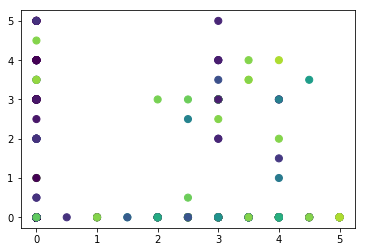

In [37]:
y_kmeans = kmeans.predict(X[:2000,:])
Xt = pca.fit_transform(X)
plt.scatter(Xt[:, 0], X[:2000, 1], c=y_kmeans, s=50, cmap='viridis')